# <div style="text-align:center; color:rgba(37, 40, 80);">11752 Machine Learning</div>
# <div style="text-align:center; color:rgba(37, 40, 80);">Master in Intelligent Systems</div>
# <div style="text-align:center; color:rgba(37, 40, 80);">Universitat de les Illes Balears</div>

### <div style="text-align:center; color:white;"> Handout #2: **Supervised learning**</div>

#### **Integrants:** Jason Adel Noboa Rivera, Pedro Martí 
#### **Group:** 03

##### T0. Normalize the dataset samples using max-min normalization and consider the following cases:



In [89]:
import math 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import openpyxl

from scipy.linalg import inv, det

from sklearn import preprocessing
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, f1_score,  precision_score, recall_score


from sklearn.neighbors import KernelDensity         #T3
from sklearn.naive_bayes import GaussianNB          #T4
from sklearn.linear_model import LogisticRegression #T5
from sklearn.model_selection import RepeatedStratifiedKFold
from statistics import mean



In [90]:
df = pd.read_csv('ds03.csv')
df

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,class
0,0.617,0.953,2.0,-4.162,1.0,0.0693,0.1190,0.000,0.3310,0.5940,154.964,192200.0,0
1,0.893,0.480,1.0,-3.728,0.0,0.3560,0.0085,0.000,0.1160,0.3820,86.976,170638.0,0
2,0.816,0.726,5.0,-3.998,0.0,0.1290,0.0990,0.000,0.3720,0.6500,136.048,253390.0,0
3,0.807,0.425,7.0,-8.452,1.0,0.0656,0.0169,0.891,0.0614,0.6600,125.987,308929.0,0
4,0.713,0.389,1.0,-8.157,1.0,0.0839,0.1650,0.637,0.0706,0.2170,178.070,167497.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
499,0.857,0.621,9.0,-6.376,0.0,0.0824,0.1480,0.000,0.0865,0.6680,97.986,204467.0,1
500,0.843,0.391,2.0,-7.899,1.0,0.0845,0.1810,0.000,0.1370,0.4960,129.972,160627.0,1
501,0.654,0.630,10.0,-4.644,1.0,0.0259,0.1530,0.000,0.1110,0.4300,89.991,167693.0,1
502,0.505,0.340,4.0,-9.005,1.0,0.0438,0.5760,0.000,0.2100,0.0916,101.993,206459.0,1


a. **case A.** All features.

In [91]:
#Case A
scaler = preprocessing.MinMaxScaler()
scaler.fit(df)
dfA = pd.DataFrame(scaler.transform(df),columns=df.columns)
dfA['class'] = df['class']
dfA

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,class
0,0.556916,0.954128,0.181818,0.821527,1.0,0.072033,0.123444,0.000000,0.324465,0.600043,0.697354,0.301882,0
1,0.894737,0.449541,0.090909,0.850778,0.0,0.538211,0.008817,0.000000,0.101018,0.371496,0.183935,0.255503,0
2,0.800490,0.711969,0.454545,0.832581,0.0,0.169106,0.102697,0.000000,0.367075,0.660414,0.554508,0.433500,0
3,0.789474,0.390868,0.636364,0.532385,1.0,0.066016,0.017531,0.952941,0.044274,0.671194,0.478531,0.552962,0
4,0.674419,0.352464,0.090909,0.552268,1.0,0.095772,0.171162,0.681283,0.053835,0.193618,0.871842,0.248747,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
499,0.850673,0.599957,0.818182,0.672306,0.0,0.093333,0.153527,0.000000,0.070360,0.679819,0.267078,0.328268,1
500,0.833537,0.354598,0.181818,0.569657,1.0,0.096748,0.187759,0.000000,0.122843,0.494394,0.508624,0.233969,1
501,0.602203,0.609558,0.909091,0.789041,1.0,0.001463,0.158714,0.000000,0.095822,0.423243,0.206703,0.249168,1
502,0.419829,0.300192,0.363636,0.495114,1.0,0.030569,0.597510,0.000000,0.198711,0.058430,0.297337,0.332553,1


b. **case B.** Best two features according to PCA.

In [92]:
#Case B
pca = PCA(n_components = 2)
dfB = pca.fit(df).transform(df)
columns = ['Feature1','Feature2']
dfB = pd.DataFrame(dfB, columns=columns)
scaler.fit(dfB)
dfB = pd.DataFrame(scaler.transform(dfB),columns=dfB.columns)
dfB['class'] = df['class']
dfB

,Feature1,Feature2,class
0,0.301882,0.700825,0
1,0.255503,0.191712,0
2,0.433500,0.566174,0
3,0.552962,0.496945,0
4,0.248747,0.870492,0
...,...,...,...
499,0.328268,0.276918,1
500,0.233969,0.511099,1
501,0.249168,0.213311,1
502,0.332553,0.307277,1


Function to fill de xlsx 

In [93]:
def fill_xlsx(i,B=None,C=None,D=None,E=None,F=None,G=None,H=None,I=None,J=None,K=None,L=None,M=None,N=None,O=None,P=None,Q=None):
    #print(f'predicionsA = {predictionsA}\n predictionsB = {predictionsB}')
    # Abrimos el archivo Excel
    wb = openpyxl.load_workbook("results.xlsx")

    # Obtenemos la hoja de cálculo
    sheet = wb["Hoja1"]
    
    # Rellenamos la celda
    sheet["B" + str(i)] = '-' if B is None != '-' else B
    sheet["C" + str(i)] = '-' if C is None != '-' else C
    sheet["D" + str(i)] = '-' if D is None != '-' else D
    sheet["E" + str(i)] = '-' if E is None != '-' else E
    sheet["F" + str(i)] = '-' if F is None != '-' else F
    sheet["G" + str(i)] = '-' if G is None != '-' else G
    sheet["H" + str(i)] = '-' if H is None != '-' else H
    sheet["I" + str(i)] = '-' if I is None != '-' else I
    sheet["J" + str(i)] = '-' if J is None != '-' else J
    sheet["K" + str(i)] = '-' if K is None != '-' else K
    sheet["L" + str(i)] = '-' if L is None != '-' else L
    sheet["M" + str(i)] = '-' if M is None != '-' else M
    sheet["N" + str(i)] = '-' if N is None != '-' else N
    sheet["O" + str(i)] = '-' if O is None != '-' else O
    sheet["P" + str(i)] = '-' if P is None != '-' else P
    sheet["Q" + str(i)] = '-' if Q is None != '-' else Q
    
    # Guardamos el archivo
    wb.save("results.xlsx")

##### T1. **(only for case B)** Assuming that class data follow a 2D Gaussian distribution, consider the **quadratic Bayesian classifier** case, i.e. different covariance matrices for each class, find and report the discrimination function g_i (x) for each class ω_i, i.e. g_i (x)=a_i x_1^2+b_i x_2^2+c_i x_1 x_2+d_i x_1+e_i x_2+f_i, and evaluate its performance. <u>HINT</u>: You need to calculate the mean and a covariance matrix for each class.

In [94]:
def calculateCoeff(covMatrix, u, c):
    
    detcovMatrix = np.linalg.det(covMatrix)

    A = -(covMatrix[1,1])/(2*detcovMatrix)
    B = -(covMatrix[0,0])/(2*detcovMatrix)
    C = covMatrix[0,1]/detcovMatrix
    D = ((u[0]*covMatrix[1,1])-(u[1]*covMatrix[0,1]))/detcovMatrix
    E = ((u[1]*covMatrix[0,0])-(u[0]*covMatrix[0,1]))/detcovMatrix
    F = -(((u[0]**2)*covMatrix[1,1])+((u[1]**2)*covMatrix[0,0])-(2*u[0]*u[1]*covMatrix[0,1]))/(2*detcovMatrix) + c

    return A, B, C, D, E, F

In [135]:
# Dividir los datos en conjuntos de entrenamiento y prueba
dfB_Train, dfB_Test = train_test_split(dfB, test_size=0.3, random_state=100)

# Separamos las clases 
dfBW0 = dfB_Train[dfB_Train['class'] == 0].drop('class', axis=1)
dfBW1 = dfB_Train[dfB_Train['class'] == 1].drop('class', axis=1)

# Calculamos la media de cada caracteristica de cada clase
meanW0 = np.array([dfBW0['Feature1'].mean() , dfBW0['Feature2'].mean()])
meanW1 = np.array([dfBW1['Feature1'].mean() , dfBW1['Feature2'].mean()])

# Calcular la media y la matriz de covarianza para cada clase
covMatrixW0 = np.cov(dfBW0, rowvar=False)
covMatrixW1 = np.cov(dfBW1, rowvar=False)


#CREAMOS LA FUNCION DISCRIMINANTE
prior = 0.5  # Clases equiprobables
c0 = - 0.5 * np.log(det(covMatrixW0)) - np.log(2*math.pi)
c1 = - 0.5 * np.log(det(covMatrixW1)) - np.log(2*math.pi)

# Calculamos las predicciones de cada una de las variables de Test

X = np.array(dfB_Test[['Feature1', 'Feature2']])
y = np.array(dfB_Test['class'])
predictions = []

for i in range(len(X)):
    g0 = -0.5 * X[i].T @ inv(covMatrixW0) @ X[i] + 0.5 * X[i].T @ inv(covMatrixW0) @ meanW0 + 0.5 * meanW0.T @ inv(covMatrixW0) @ X[i] - 0.5 * meanW0.T @ inv(covMatrixW0) @ meanW0 + np.log(prior) + c0
    g1 = -0.5 * X[i].T @ inv(covMatrixW1) @ X[i] + 0.5 * X[i].T @ inv(covMatrixW1) @ meanW1 + 0.5 * meanW1.T @ inv(covMatrixW1) @ X[i] - 0.5 * meanW1.T @ inv(covMatrixW1) @ meanW1 + np.log(prior) + c1

    if g0 > g1:
        predictions.append(0)
    else:
        predictions.append(1)


# Para obtener la formula 
A0, B0, C0, D0, E0, F0 = calculateCoeff(covMatrixW0,meanW0, c0)

print('Formula g1(x): ',A0.round(2),'x1^2  + ',B0.round(2),'x2^2  + ',C0.round(2),'x1x2  + ',D0.round(2),'x1  + ',E0.round(2),'x2  + ',F0.round(2))

    # Obtenemos los valores de: 
A1, B1, C1, D1, E1, F1 = calculateCoeff(covMatrixW1, meanW1, c1)

print('Formula g2(x): ',A1.round(2),'x1^2  + ',B1.round(2),'x2^2  + ',C1.round(2),'x1x2  + ',D1.round(2),'x1  + ',E1.round(2),'x2  + ',F1.round(2))

#Calculamos la precision del modelo
accuracy = accuracy_score(y, predictions)
#print('Exactitud: (Accuracy):', (accuracy*100).round(2),'%')

# Write on xlsx
fill_xlsx(i=3,
          J=accuracy_score(y, predictions), 
          L=precision_score(y, predictions),
          N=recall_score(y, predictions),
          P=f1_score(y, predictions))


Formula g1(x):  -24.5 x1^2  +  -12.87 x2^2  +  -3.55 x1x2  +  20.22 x1  +  12.99 x2  +  -5.05
Formula g2(x):  -111.46 x1^2  +  -13.54 x2^2  +  17.33 x1x2  +  61.81 x1  +  6.59 x2  +  -8.6


In [140]:
dfB

,Feature1,Feature2,class
0,0.301882,0.700825,0
1,0.255503,0.191712,0
2,0.433500,0.566174,0
3,0.552962,0.496945,0
4,0.248747,0.870492,0
...,...,...,...
499,0.328268,0.276918,1
500,0.233969,0.511099,1
501,0.249168,0.213311,1
502,0.332553,0.307277,1


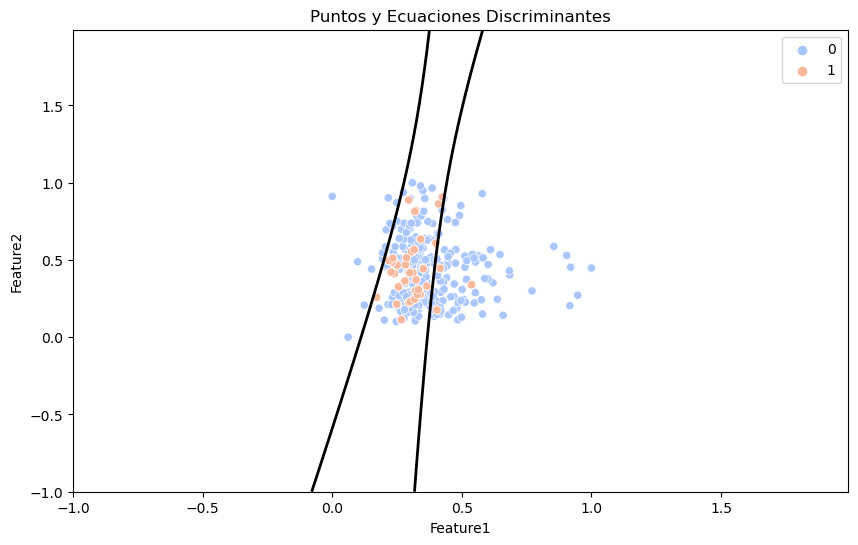

In [96]:
# Supongamos que ya has realizado la división y el cálculo de las medias y covarianzas

# Crea una malla de puntos para la visualización
x_min, x_max = dfB['Feature1'].min() - 1, dfB['Feature1'].max() + 1
y_min, y_max = dfB['Feature2'].min() - 1, dfB['Feature2'].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01), np.arange(y_min, y_max, 0.01))

# Calcula las funciones discriminantes para cada punto en la malla
Z0 = np.zeros_like(xx)
Z1 = np.zeros_like(xx)

for i in range(xx.shape[0]):
    for j in range(xx.shape[1]):
        point = np.array([xx[i, j], yy[i, j]])
        g0 = -0.5 * point.T @ inv(covMatrixW0) @ point + 0.5 * point.T @ inv(covMatrixW0) @ meanW0 + 0.5 * meanW0.T @ inv(covMatrixW0) @ point - 0.5 * meanW0.T @ inv(covMatrixW0) @ meanW0 + np.log(prior) + c0
        g1 = -0.5 * point.T @ inv(covMatrixW1) @ point + 0.5 * point.T @ inv(covMatrixW1) @ meanW1 + 0.5 * meanW1.T @ inv(covMatrixW1) @ point - 0.5 * meanW1.T @ inv(covMatrixW1) @ meanW1 + np.log(prior) + c1
        Z0[i, j] = g0
        Z1[i, j] = g1

# Grafica los puntos y las regiones de decisión
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Feature1', y='Feature2', hue='class', data=dfB, palette='coolwarm', legend='full')
plt.contour(xx, yy, Z0-Z1, levels=[0], linewidths=2, colors='black')  # Línea de decisión

plt.title('Puntos y Ecuaciones Discriminantes')
plt.xlabel('Feature1')
plt.ylabel('Feature2')
plt.legend(loc='upper right')
plt.show()


## T2. (Only for case B)

In [97]:

#Calculamos una sola matriz para todas las clases
covMatrix2Class = np.cov(dfB_Train.drop('class', axis=1), rowvar=False)

#CREAMOS LA FUNCION DISCRIMINANTE
prior = 0.5  # Clases equiprobables
c = - 0.5 * np.log(det(covMatrix2Class)) - np.log(2*math.pi)

# Calculamos las predicciones de cada una de las variables de Test

X = np.array(dfB_Test[['Feature1', 'Feature2']])
y = np.array(dfB_Test['class'])
predictions = []

for i in range(len(X)):
    g0 = -0.5 * X[i].T @ inv(covMatrix2Class) @ X[i] + 0.5 * X[i].T @ inv(covMatrix2Class) @ meanW0 + 0.5 * meanW0.T @ inv(covMatrix2Class) @ X[i] - 0.5 * meanW0.T @ inv(covMatrix2Class) @ meanW0 + np.log(prior) + c
    g1 = -0.5 * X[i].T @ inv(covMatrix2Class) @ X[i] + 0.5 * X[i].T @ inv(covMatrix2Class) @ meanW1 + 0.5 * meanW1.T @ inv(covMatrix2Class) @ X[i] - 0.5 * meanW1.T @ inv(covMatrix2Class) @ meanW1 + np.log(prior) + c

    if g0 > g1:
        predictions.append(0)
    else:
        predictions.append(1)


# Para obtener la formula 
    #Sacamos el determinante de la matriz 
detcovMatrix = np.linalg.det(covMatrix2Class)

    # Obtenemos los valores de: 
A0, B0, C0, D0, E0, F0 = calculateCoeff(covMatrix2Class,meanW0, c)

print('Formula W0: ',D0.round(2),'x1  + ',E0.round(2),'x2  + ',F0.round(2))

    # Obtenemos los valores de: 
A1, B1, C1, D1, E1, F1 = calculateCoeff(covMatrix2Class,meanW1, c)

print('Formula W1: ',D1.round(2),'x1  + ',E1.round(2),'x2  + ',F1.round(2))



#Calculamos la precision del modelo
accuracy = accuracy_score(y, predictions)
print('Exactitud (Accuracy):', (accuracy*100).round(2),'%')
fill_xlsx(i=4,
          J=accuracy_score(y, predictions), 
          L=precision_score(y, predictions),
          N=recall_score(y, predictions),
          P=f1_score(y, predictions))



Formula W0:  27.17 x1  +  11.45 x2  +  -5.83
Formula W1:  22.26 x1  +  11.23 x2  +  -4.03
Exactitud (Accuracy): 66.45 %


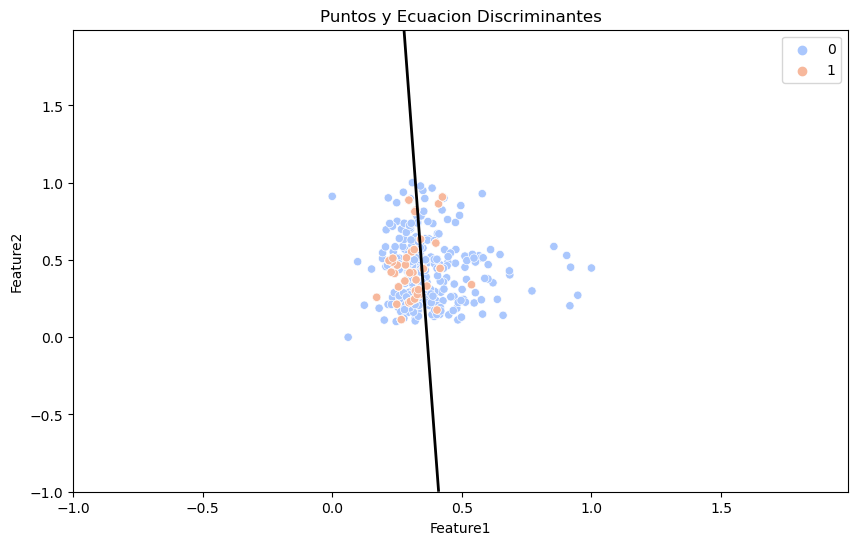

In [98]:
# Crea una malla de puntos para la visualización
x_min, x_max = dfB['Feature1'].min() - 1, dfB['Feature1'].max() + 1
y_min, y_max = dfB['Feature2'].min() - 1, dfB['Feature2'].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01), np.arange(y_min, y_max, 0.01))

# Calcula las funciones discriminantes para cada punto en la malla
Z0 = np.zeros_like(xx)
Z1 = np.zeros_like(xx)

for i in range(xx.shape[0]):
    for j in range(xx.shape[1]):
        point = np.array([xx[i, j], yy[i, j]])
        g0 = -0.5 * point.T @ inv(covMatrix2Class) @ point + 0.5 * point.T @ inv(covMatrix2Class) @ meanW0 + 0.5 * meanW0.T @ inv(covMatrix2Class) @ point - 0.5 * meanW0.T @ inv(covMatrix2Class) @ meanW0 + np.log(prior) + c
        g1 = -0.5 * point.T @ inv(covMatrix2Class) @ point + 0.5 * point.T @ inv(covMatrix2Class) @ meanW1 + 0.5 * meanW1.T @ inv(covMatrix2Class) @ point - 0.5 * meanW1.T @ inv(covMatrix2Class) @ meanW1 + np.log(prior) + c
        Z0[i, j] = g0
        Z1[i, j] = g1

# Grafica los puntos y las regiones de decisión
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Feature1', y='Feature2', hue='class', data=dfB, palette='coolwarm', legend='full')
plt.contour(xx, yy, Z0-Z1, levels=[0], linewidths=2, colors='black')  # Línea de decisión

plt.title('Puntos y Ecuacion Discriminantes')
plt.xlabel('Feature1')
plt.ylabel('Feature2')
plt.legend(loc='upper right')
plt.show()

## T3. (Cases A and B)

In [99]:
def splitDF(dataFrame):
    x = np.array(dataFrame.drop('class',axis=1))
    y = np.array(dataFrame['class'])
    return x, y

def split_Class(df_Train,df_Test):
    # Separamos las clases 
    dfW0_Train = df_Train[df_Train['class'] == 0]
    dfW1_Train = df_Train[df_Train['class'] == 1]

    # Dividir los datos de entrenamiento en características y clases
    xW0_Train = np.array(dfW0_Train.drop('class', axis=1))
    xW1_Train = np.array(dfW1_Train.drop('class', axis=1))

    # Dividimos los datos de prueba
    x_Test, y_Test = splitDF(df_Test)

    return xW0_Train, xW1_Train, x_Test, y_Test

def calculatehN(xW0_Train,xW1_Train):
    hNW0 = 1/(math.sqrt(len(xW0_Train)))
    hNW1 = 1/(math.sqrt(len(xW1_Train)))
    return hNW0, hNW1

def calculateModelKDE(xW0_Train, xW1_Train, x_Test, y_Test, hNW0, hNW1):
    # Entrenamos el modelo para cada clase
    kdeW0 = KernelDensity(bandwidth=hNW0, kernel='gaussian').fit(xW0_Train)
    kdeW1 = KernelDensity(bandwidth=hNW1, kernel='gaussian').fit(xW1_Train)

    # Calculate log-likelihoods for test data
    logLikelihoodW0 = kdeW0.score_samples(x_Test)
    logLikelihoodW1 = kdeW1.score_samples(x_Test)

    # Calculate posterior probabilities
    probW0 = np.exp(logLikelihoodW0)
    probW1 = np.exp(logLikelihoodW1)

    # Make predictions based on the class with higher posterior probability
    predictions = (probW1 > probW0).astype(int)

    # Evaluate the performance
    accuracy = accuracy_score(y_Test, predictions)

    return accuracy, predictions

In [100]:
'''
Dividimos el dataset en clases
'''
dfB_Train, dfB_Test = train_test_split(dfB, test_size=0.3, random_state=100)
dfA_Train, dfA_Test = train_test_split(dfA, test_size=0.3, random_state=100)

xBW0_Train, xBW1_Train, xB_Test, yB_Test = split_Class(dfB_Train, dfB_Test)
xAW0_Train, xAW1_Train, xA_Test, yA_Test = split_Class(dfA_Train, dfA_Test)

hNAW0, hNAW1 = calculatehN(xAW0_Train, xAW1_Train)
hNBW0, hNBW1 = calculatehN(xBW0_Train, xBW1_Train)


'''
Entrenamos el Modelo para Caso B
'''
accuracyA, predicitonsA = calculateModelKDE(xAW0_Train, xAW1_Train, xA_Test, yA_Test, hNAW0, hNAW1)
accuracyB, predictionsB = calculateModelKDE(xBW0_Train, xBW1_Train, xB_Test, yB_Test, hNBW0, hNBW1)


'''
Imprimimos los resultados
'''
print('Exactitud Caso A (Accuracy): ',(accuracyA*100).round(2),'%')
print('Exactitud Caso B (Accuracy): ',(accuracyB*100).round(2),'%')
fill_xlsx(i=5,
          B=accuracy_score(y, predicitonsA), 
          D=precision_score(y, predicitonsA),
          F=recall_score(y, predicitonsA),
          H=f1_score(y, predicitonsA),
          J=accuracy_score(y, predictionsB), 
          L=precision_score(y, predictionsB),
          N=recall_score(y, predictionsB),
          P=f1_score(y, predictionsB))


Exactitud Caso A (Accuracy):  92.76 %
Exactitud Caso B (Accuracy):  67.76 %


## T4. (Cases A and B)

In [101]:
def calculateModel_crossValidation(x, y, rskf, model):
    accuracy = []
    precision = []
    recall = []
    f1_s = []
    
    for trainIndex, testIndex in rskf.split(x,y):
        x_Train, x_Test = x[trainIndex], x[testIndex]
        y_Train, y_Test = y[trainIndex], y[testIndex]
        # Entrenamos el modelo para cada clase
        trainModel = model.fit(x_Train, y_Train) #Usar crossvalidation

        # Make predictions based on the class with higher posterior probability
        predictions = trainModel.predict(x_Test)

        # Evaluate the performance
        accuracy.append(accuracy_score(y_Test, predictions))
        precision.append(precision_score(y_Test, predictions))
        recall.append(recall_score(y_Test, predictions))
        f1_s.append(f1_score(y_Test, predictions))
    return accuracy, predictions, precision, recall, f1_s

In [102]:
xA, yA = splitDF(dfA)
xB, yB = splitDF(dfB)

rskf = RepeatedStratifiedKFold(n_splits=5, n_repeats=3, random_state=100)
modelT4 = GaussianNB()

accuracyT4A, predictionsA, precisionT4A, recallT4A, f1_sT4A = calculateModel_crossValidation(xA, yA, rskf, modelT4)
accuracyT4B, predictionsB, precisionT4B, recallT4B, f1_sT4B = calculateModel_crossValidation(xB, yB, rskf, modelT4)

'''
Imprimimos los resultados
'''
print('Exactitud Caso A (Prom): ',(mean(accuracyT4A)*100).round(2),'%')
print('Desviación Estándar Caso A: ',np.std(accuracyT4A).round(5))
print('Exactitud Caso B (Prom): ',(mean(accuracyT4B)*100).round(2),'%')
print('Desviación Estándar Caso B: ',np.std(accuracyT4B).round(5))

'''
Escribimos en la tabla de resultados
'''
fill_xlsx(i=6,
          B=np.mean(accuracyT4A), C=np.std(accuracyT4A), 
          D=np.mean(precisionT4A), E=np.std(precisionT4A), 
          F=np.mean(recallT4A), G=np.std(recallT4A), 
          H=np.mean(f1_sT4A), I=np.std(f1_sT4A), 
          J=np.mean(accuracyT4B), K=np.std(accuracyT4B), 
          L=np.mean(precisionT4B), M=np.std(precisionT4B), 
          N=np.mean(recallT4B), O=np.std(recallT4B), 
          P=np.mean(f1_sT4B), Q=np.std(f1_sT4B))

Exactitud Caso A (Prom):  71.16 %
Desviación Estándar Caso A:  0.05564
Exactitud Caso B (Prom):  59.99 %
Desviación Estándar Caso B:  0.05037


## T5. (Cases A and B)

In [103]:
modelT5 = LogisticRegression(penalty=None)
accuracyT5A, predictionsA, precisionT5A, recallT5A, f1_sT5A = calculateModel_crossValidation(xA, yA, rskf, modelT5)
accuracyT5B, predictionsB, precisionT5B, recallT5B, f1_sT5B = calculateModel_crossValidation(xB, yB, rskf, modelT5)

'''
Imprimimos los resultados
'''
print('Exactitud Caso A (Prom): ',(mean(accuracyT5A)*100).round(2),'%')
print('Desviación Estándar Caso A: ',np.std(accuracyT5A).round(5))
print('Exactitud Caso B (Prom): ',(mean(accuracyT5B)*100).round(2),'%')
print('Desviación Estándar Caso B: ',np.std(accuracyT5B).round(5))

'''
Escribimos en la tabla de resultados
'''
fill_xlsx(i=7,
          B=np.mean(accuracyT5A), C=np.std(accuracyT5A), 
          D=np.mean(precisionT5A), E=np.std(precisionT5A), 
          F=np.mean(recallT5A), G=np.std(recallT5A), 
          H=np.mean(f1_sT5A), I=np.std(f1_sT5A), 
          J=np.mean(accuracyT5B), K=np.std(accuracyT5B), 
          L=np.mean(precisionT5B), M=np.std(precisionT5B), 
          N=np.mean(recallT5B), O=np.std(recallT5B), 
          P=np.mean(f1_sT5B), Q=np.std(f1_sT5B))

Exactitud Caso A (Prom):  78.83 %
Desviación Estándar Caso A:  0.04094
Exactitud Caso B (Prom):  63.16 %
Desviación Estándar Caso B:  0.04056


### T6. (Case A and B)

In [104]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import StackingClassifier
from sklearn.model_selection import  RepeatedStratifiedKFold

base_classifiers = [
    ('NB', GaussianNB()),
    ('LR', LogisticRegression(penalty=None)),
    ('DT', DecisionTreeClassifier(min_samples_leaf=10)) # regularization of DT imposing a minimum of 10 samples per leaf
]

# maximum depth of 3 for the second layer (the blender)
blender = DecisionTreeClassifier(max_depth=3)

# Create the stacking ensemble model
modelT6 = StackingClassifier(estimators=base_classifiers, final_estimator=blender)



# Evaluate the model 
accuracyT6A, predictionsA, precisionT6A, recallT6A, f1_sT6A = calculateModel_crossValidation(xA, yA, rskf, modelT6)
accuracyT6B, predictionsB, precisionT6B, recallT6B, f1_sT6B = calculateModel_crossValidation(xB, yB, rskf, modelT6)

'''
Imprimimos los resultados
'''
print('Exactitud Caso A (Prom): ',(mean(accuracyT6A)*100).round(2),'%')
print('Desviación Estándar Caso A: ',np.std(accuracyT6A).round(5))
print('Exactitud Caso B (Prom): ',(mean(accuracyT6B)*100).round(2),'%')
print('Desviación Estándar Caso B: ',np.std(accuracyT6B).round(5))

'''
Escribimos resultados en la tabla
'''
fill_xlsx(i=8,
          B=np.mean(accuracyT6A), C=np.std(accuracyT6A), 
          D=np.mean(precisionT6A), E=np.std(precisionT6A), 
          F=np.mean(recallT6A), G=np.std(recallT6A), 
          H=np.mean(f1_sT6A), I=np.std(f1_sT6A), 
          J=np.mean(accuracyT6B), K=np.std(accuracyT6B), 
          L=np.mean(precisionT6B), M=np.std(precisionT6B), 
          N=np.mean(recallT6B), O=np.std(recallT6B), 
          P=np.mean(f1_sT6B), Q=np.std(f1_sT6B))

Exactitud Caso A (Prom):  85.12 %
Desviación Estándar Caso A:  0.03712
Exactitud Caso B (Prom):  76.66 %
Desviación Estándar Caso B:  0.04633


### T7. (Case A and B)

In [105]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
# A
RF = RandomForestClassifier()

# B
param_grid = {
    'min_samples_leaf': [5, 10],
    'n_estimators': [20, 40, 60], #Nº trees en el forest
    'criterion':['gini', 'entropy'] # Mide la calidad del split
}


# Inicializamos GridSearchCV con los parámetros definidos en el enunciado
grid_search_cvA = GridSearchCV(estimator=RF, param_grid = param_grid, cv=3, verbose=1, n_jobs=1)
grid_search_cvB = GridSearchCV(estimator=RF, param_grid = param_grid, cv=3, verbose=1, n_jobs=1)

grid_search_cvA.fit(xA, yA)
modelT7A = grid_search_cvA.best_estimator_ # Cogemos el mejor estimador

grid_search_cvB.fit(xB, yB)
modelT7B = grid_search_cvB.best_estimator_ # Cogemos el mejor estimador

# Evaluate the model 
accuracyT7A, predictionsA, precisionT7A, recallT7A, f1_sT7A = calculateModel_crossValidation(xA, yA, rskf, modelT7A)
accuracyT7B, predictionsB, precisionT7B, recallT7B, f1_sT7B = calculateModel_crossValidation(xB, yB, rskf, modelT7B)

# Print the best parameters and best score
'''
Imprimimos los resultados
'''
print('Exactitud Caso A (Prom): ',(mean(accuracyT7A)*100).round(2),'%')
print('Desviación Estándar Caso A: ',np.std(accuracyT7A).round(5))
print('Exactitud Caso B (Prom): ',(mean(accuracyT7B)*100).round(2),'%')
print('Desviación Estándar Caso B: ',np.std(accuracyT7B).round(5))

print("Best Parameters for Case A:", grid_search_cvA.best_params_)
print("Best Score for Case A:", grid_search_cvA.best_score_)

print("Best Parameters for Case B:", grid_search_cvB.best_params_)
print("Best Score for Case B:", grid_search_cvB.best_score_)

fill_xlsx(i=9,
          B=np.mean(accuracyT7A), C=np.std(accuracyT7A), 
          D=np.mean(precisionT7A), E=np.std(precisionT7A), 
          F=np.mean(recallT7A), G=np.std(recallT7A), 
          H=np.mean(f1_sT7A), I=np.std(f1_sT7A), 
          J=np.mean(accuracyT7B), K=np.std(accuracyT7B), 
          L=np.mean(precisionT7B), M=np.std(precisionT7B), 
          N=np.mean(recallT7B), O=np.std(recallT7B), 
          P=np.mean(f1_sT7B), Q=np.std(f1_sT7B))

Fitting 3 folds for each of 12 candidates, totalling 36 fits
Fitting 3 folds for each of 12 candidates, totalling 36 fits
Exactitud Caso A (Prom):  92.59 %
Desviación Estándar Caso A:  0.03042
Exactitud Caso B (Prom):  85.19 %
Desviación Estándar Caso B:  0.04117
Best Parameters for Case A: {'criterion': 'gini', 'min_samples_leaf': 5, 'n_estimators': 20}
Best Score for Case A: 0.9325396825396824
Best Parameters for Case B: {'criterion': 'gini', 'min_samples_leaf': 5, 'n_estimators': 20}
Best Score for Case B: 0.873015873015873


### T8. (Evaluate best model)

#### (a) Case B

In [106]:
dfB

,Feature1,Feature2,class
0,0.301882,0.700825,0
1,0.255503,0.191712,0
2,0.433500,0.566174,0
3,0.552962,0.496945,0
4,0.248747,0.870492,0
...,...,...,...
499,0.328268,0.276918,1
500,0.233969,0.511099,1
501,0.249168,0.213311,1
502,0.332553,0.307277,1


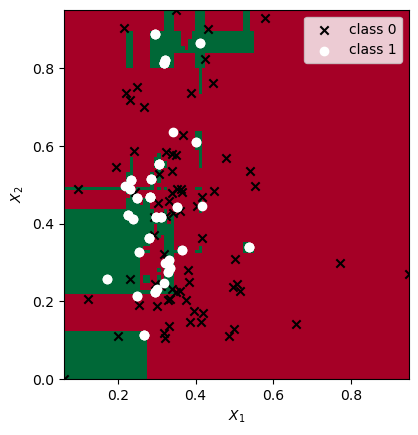

In [107]:
dfB_Train, dfB_Test = train_test_split(dfB, test_size=0.3, random_state=100)
Xte, yte = splitDF(dfB_Test)



def plot_class(c, X, y):
    m1 = ['k', 'w']
    m2 = ['x', 'o']
    i = np.where(y == c)[0]
    plt.scatter(X[i, 0], X[i, 1], c=m1[c], marker=m2[c], label='class %d' % c)


# Replace Xte, yte with your test set for case B
x1lim = [Xte[:, 0].min(), Xte[:, 0].max()]
x2lim = [Xte[:, 1].min(), Xte[:, 1].max()]

npts = 100
x1s = np.linspace(x1lim[0], x1lim[1], npts)
x2s = np.linspace(x2lim[0], x2lim[1], npts)

model = modelT7B
m = np.zeros((npts, npts))
for k1, x1 in enumerate(x1s):
    for k2, x2 in enumerate(x2s):
        x = np.array([x1, x2])
        m[k1, k2] = model.predict([x])

plt.figure()
plt.imshow(m.T, cmap='RdYlGn', origin='lower', extent=(x1lim[0], x1lim[1], x2lim[0], x2lim[1]))
for c in range(2):  # Assuming binary classification. Change if more classes.
    plot_class(c, Xte, yte)
plt.xlabel('$X_1$')
plt.ylabel('$X_2$')
plt.legend()
plt.show()


#### (b) Clasify examples

In [108]:
test8 = pd.read_csv('ds07_samples.csv')
test8

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,class
0,0.542,0.928,0.0,-4.402,1.0,0.0902,0.0017,0.1340,0.0836,0.186,128.021,185625.0,0
1,0.828,0.580,7.0,-4.395,1.0,0.0941,0.0255,0.0000,0.1030,0.407,89.973,235067.0,0
2,0.769,0.787,11.0,-3.909,1.0,0.3670,0.1890,0.0000,0.1290,0.836,126.770,159715.0,1
3,0.786,0.808,7.0,-3.702,1.0,0.0882,0.0846,0.0003,0.0822,0.609,105.027,301714.0,1


In [130]:
#test8 = np.array(test8.drop('class',axis=1))

xA8, yA8 = splitDF(dfA)

trainModel8 = modelT7A.fit(xA8, yA8)
predictions = trainModel8.predict(test8)
predictions

array([0, 0, 0, 0], dtype=int64)

In [131]:
proba = trainModel8.predict_proba(test8)
proba

array([[0.91428571, 0.08571429],
       [0.86727273, 0.13272727],
       [0.7918263 , 0.2081737 ],
       [0.89602273, 0.10397727]])